## Import & Setting

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import config
import os
import utils
import numpy as np
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RANSACRegressor

data = config.config()

## Functions

In [2]:
def cal_error_regression(depth_name_list, df_regression):
    reg_depth_error, reg_depth_error_rate, reg_depth_error_rate_avg, reg_depth = utils.melt_to_col(depth_name_list,
                                                                                                   df_regression)
    reg_depth_diff = utils.create_dataframe(reg_depth_error, depth_name_list)
    reg_depth_reg = utils.create_dataframe(reg_depth, depth_name_list)
    df_depth_reg_error_rate = utils.df_to_error_rate_list(reg_depth_reg)
    return reg_depth_diff, df_depth_reg_error_rate

In [3]:
def set_regression(depth_list, depth_name_list, degree=2):
    df_depth_reggresion = pd.DataFrame(depth_list, depth_name_list).T.melt().dropna(axis=0)
    df_feature, poly_leg = utils.poly_feature(df_depth_reggresion['value'].values.reshape(-1, 1), degree)
    lin_reg_2 = LinearRegression()
    # lin_reg_2 = Ridge()
    lin_reg_2.fit(df_feature, df_depth_reggresion['variable'].values)
    utils.write_coef(data.file_manager.save_path, np.array(lin_reg_2.coef_), degree)
    # lin_reg_2 = RANSACRegressor(random_state=0).fit(df_feature, df_depth_reggresion['variable'].values)
    predict_Y = lin_reg_2.predict(poly_leg.fit_transform(df_depth_reggresion['value'].values.reshape(-1, 1)))
    df_depth_reggresion['regression'] = lin_reg_2.predict(
        poly_leg.fit_transform(df_depth_reggresion['value'].values.reshape(-1, 1)))
    return df_depth_reggresion

In [4]:
def boxplot(df_diff, df_rate):
    df_mean = df_diff.T.mean()
    ax = df_diff.T.plot(kind='box')
    ax.plot(ax.get_xticks(), df_mean, color='orange', linewidth=0.5, marker='o', markersize=0.8)
    # for i in range(len(df_rate)):
    #     ax.text(ax.get_xticks()[i]-0.15, -1.5, "{}%".format(round(df_rate[i], 2)), fontsize=7.5, color='red')
    plt.xlabel('depth(m)')
    plt.ylabel('error(m)')
    plt.grid(True)
    plt.title('average error rate : {}%'.format(round(float(sum(df_rate) / len(df_rate)), 2)))
    plt.show()

## Set variable (Road)

In [5]:
category = 'road'

## Read gt_distance

In [6]:
if not utils.check_exist(data.file_manager.regression_data + os.path.join('/', category)):
    utils.make_folder(data.file_manager.regression_data + os.path.join('/', category))
data.file_manager.path_category_update(category)

gt_dist = data.distance.read_gt_distance(utils.read_folder_list(data.file_manager.img_path),
                                         data.file_manager.gt_distance_path)
folder_names = gt_dist.keys()
scale = data.file_manager.scale_num
degree = data.file_manager.degree_num

## Load depth list

In [7]:
depth_list, bottom_depth_list, depth_name_list, depth_diff, box_coord = utils.load_depth_list(
    data.file_manager.save_path,
    gt_dist, folder_names,
    scale)

## Plot - original

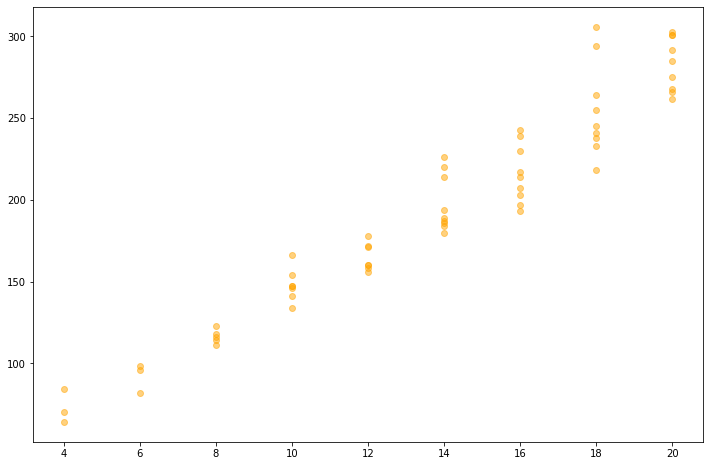

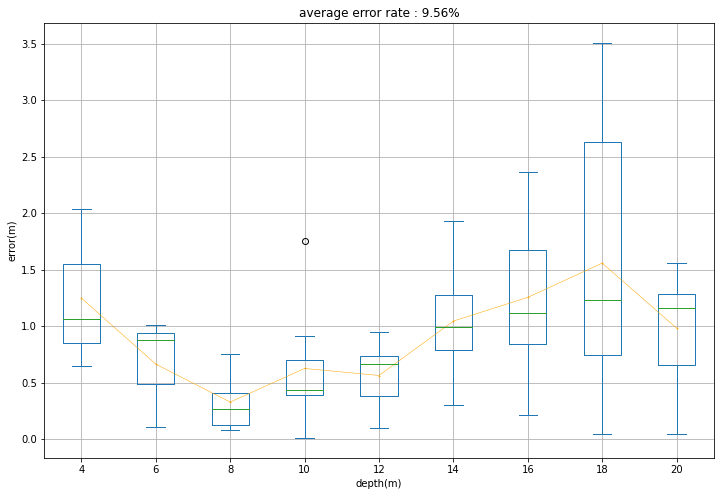

In [141]:
df_depth_regression = set_regression(depth_list, depth_name_list, degree=degree)
df_reg_diff_ori, df_error_rate_ori = cal_error_regression(depth_name_list, df_depth_regression)
plt.scatter(df_depth_regression['variable'].values, df_depth_regression['value'].values, c="orange", alpha=0.5)
boxplot(df_reg_diff_ori, df_error_rate_ori)
df_depth_regression.to_csv(
    data.file_manager.regression_data + os.path.join('/', category) +
    os.path.join('/', 'regression_original_{}.csv'.format(degree)))
plt.show()

## Plot - mode

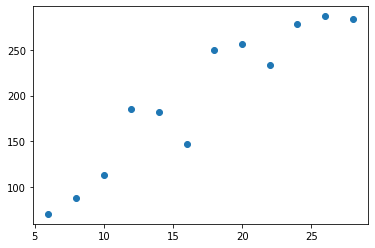

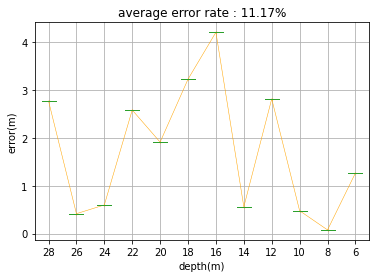

In [9]:
    df_depth_mode_list = utils.df_option_to_list(utils.create_dataframe(depth_list, depth_name_list))
    df_depth_mode_regression = set_regression(df_depth_mode_list, depth_name_list)
    df_reg_diff_mode, df_error_rate_mode = cal_error_regression(depth_name_list, df_depth_mode_regression)
    plt.scatter(df_depth_mode_regression['variable'].values, df_depth_mode_regression['value'].values)
    df_depth_mode_regression.to_csv(
        data.file_manager.regression_data + os.path.join('/', category) +
        os.path.join('/', 'regression_mode_{}.csv'.format(degree)))
    boxplot(df_reg_diff_mode, df_error_rate_mode)

# Plot - *ground*

## Initialize *ground* configuration

In [15]:
data = config.config()

## Set variable (*ground*)

In [16]:
category = 'ground'
direction_e = 'east'
direction_w = 'west'
direction_n = 'north'
direction_s = 'south'

## *ground* path check

In [17]:
# East
data.file_manager.path_category_update(category, direction_e)
if not utils.check_exist(data.file_manager.regression_data + os.path.join('/', category) + os.path.join('/', direction_e)):
    utils.make_folder(data.file_manager.regression_data + os.path.join('/', category) + os.path.join('/', direction_e))

In [11]:
# West
data.file_manager.path_category_update(category, direction_w)
if not utils.check_exist(data.file_manager.regression_data + os.path.join('/', category) + os.path.join('/', direction_w)):
    utils.make_folder(data.file_manager.regression_data + os.path.join('/', category) + os.path.join('/', direction_w))

In [12]:
# North
data.file_manager.path_category_update(category, direction_n)
if not utils.check_exist(data.file_manager.regression_data + os.path.join('/', category) + os.path.join('/', direction_n)):
    utils.make_folder(data.file_manager.regression_data + os.path.join('/', category) + os.path.join('/', direction_n))

In [13]:
# South
data.file_manager.path_category_update(category, direction_s)
if not utils.check_exist(data.file_manager.regression_data + os.path.join('/', category) + os.path.join('/', direction_s)):
    utils.make_folder(data.file_manager.regression_data + os.path.join('/', category) + os.path.join('/', direction_s))

## Read *gt_distance*

In [18]:
gt_dist = data.distance.read_gt_distance(utils.read_folder_list(data.file_manager.img_path),
                                         data.file_manager.gt_distance_path)
gt_dist
folder_names = gt_dist.keys()
scale = data.file_manager.scale_num
degree = data.file_manager.degree_num
depth_list, bottom_depth_list, depth_name_list, depth_diff, box_coord = utils.load_depth_list(
    data.file_manager.save_path,
    gt_dist, folder_names,
    scale,
    ground=True)

0006
153 177 
329 176 
508 173 
0008
66 159 
191 157 
325 158 
463 156 
582 154 
0010
21 146 
113 146 
216 146 
323 145 
432 144 
534 143 
627 143 
0012
62 139 
143 139 
229 139 
320 138 
413 138 
499 137 
580 137 
0014
27 134 
94 134 
167 134 
242 134 
320 134 
400 132 
475 133 
545 132 
613 131 
0016
60 131 
122 127 
186 130 
252 129 
320 129 
391 128 
457 128 
519 128 
580 128 
0018
87 127 
142 125 
200 127 
260 126 
320 126 
383 126 
442 124 
499 125 
554 123 
0020
108 124 
159 123 
211 124 
266 123 
320 123 
376 122 
429 123 
482 122 
533 122 


## Plot - *ewns*

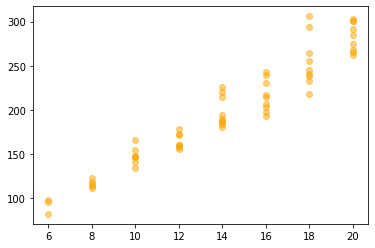

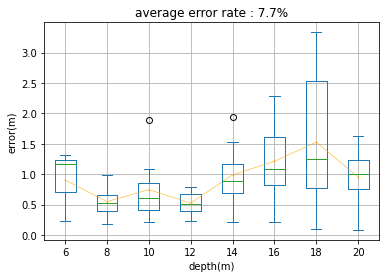

In [19]:
df_depth_regression = set_regression(depth_list, depth_name_list, degree=degree)
df_reg_diff_ori, df_error_rate_ori = cal_error_regression(depth_name_list, df_depth_regression)
plt.scatter(df_depth_regression['variable'].values, df_depth_regression['value'].values, c="orange", alpha=0.5)
boxplot(df_reg_diff_ori, df_error_rate_ori)
df_depth_regression.to_csv(
    data.file_manager.regression_data + os.path.join('/', category) +
    os.path.join('/', 'regression_original_{}.csv'.format(degree)))
plt.show()

## Plot - *east*

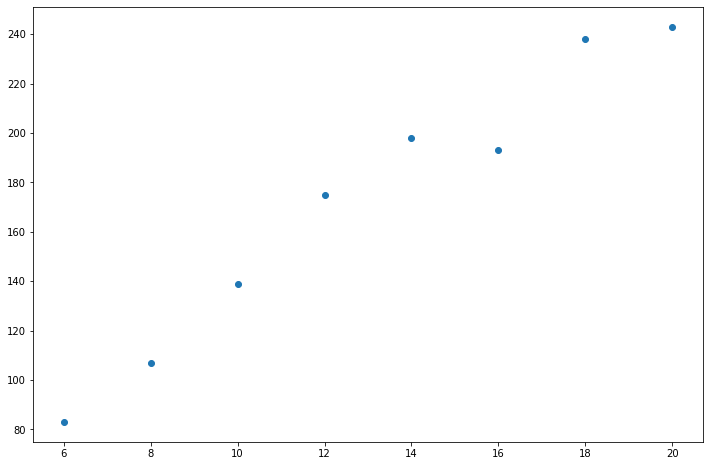

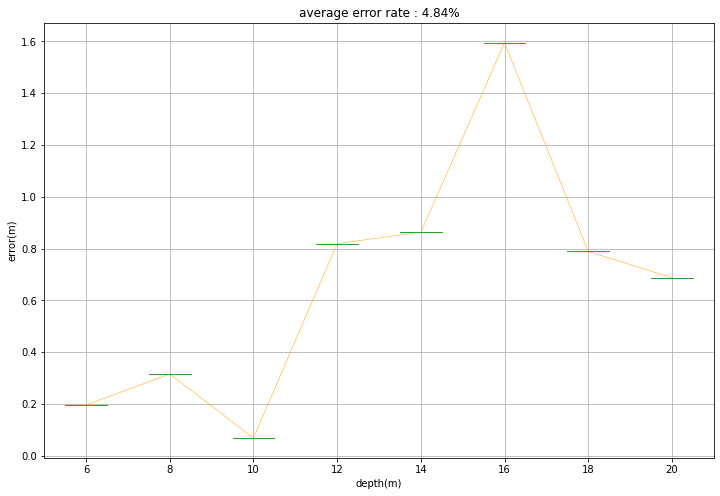

In [627]:
df_depth_mode_list = utils.df_option_to_list(utils.create_dataframe(depth_list, depth_name_list))
df_depth_mode_regression = set_regression(df_depth_mode_list, depth_name_list)
df_reg_diff_mode, df_error_rate_mode = cal_error_regression(depth_name_list, df_depth_mode_regression)
plt.scatter(df_depth_mode_regression['variable'].values, df_depth_mode_regression['value'].values)
df_depth_mode_regression.to_csv(
    data.file_manager.regression_data + os.path.join('/', category) +
    os.path.join('/', 'regression_mode_{}.csv'.format(degree)))
boxplot(df_reg_diff_mode, df_error_rate_mode)

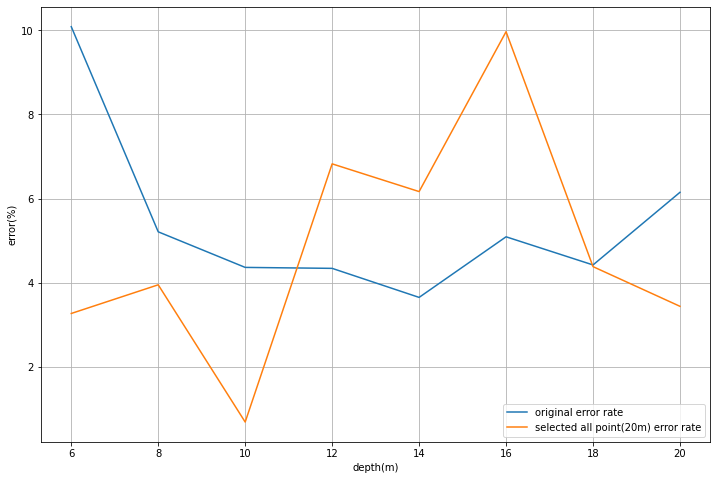

In [628]:
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(depth_name_list, df_error_rate_ori)
plt.plot(depth_name_list, df_error_rate_mode)
plt.legend(['original error rate', 'selected all point(20m) error rate'])
plt.xlabel('depth(m)')
plt.ylabel('error(%)')
plt.grid(True)

## Plot selected distance (0020) ->*20m*

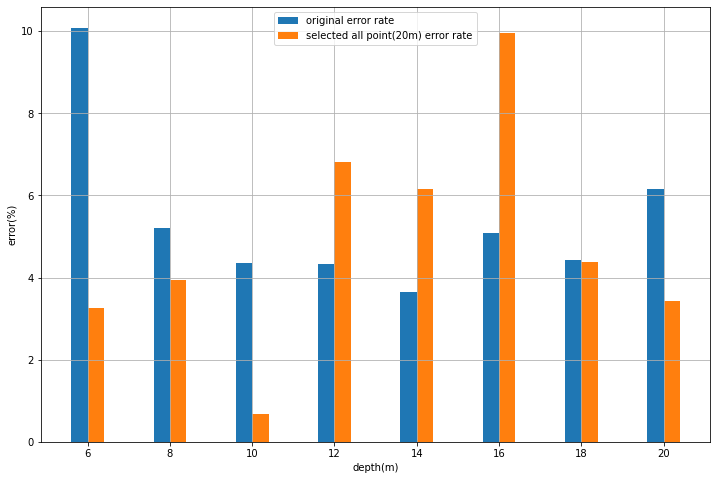

In [629]:
df_error_rate_mode
x = np.arange(8)
plt.bar(x-0.1, df_error_rate_ori, width=0.2)
plt.bar(x+0.1, df_error_rate_mode, alpha=1, width=0.2)
plt.xticks(x, depth_name_list)
plt.legend(['original error rate', 'selected all point(20m) error rate'])
plt.xlabel('depth(m)')
plt.ylabel('error(%)')
plt.grid(True)

In [630]:
folder_names_list = list(folder_names)
selected_dist = folder_names_list[-1] # 0020 -> 20m
data.file_manager.depth_file = utils.rand_img(data.file_manager.depth_path + os.path.join('/', selected_dist))
selected_dist_path = data.file_manager.depth_path + os.path.join('/', selected_dist, data.file_manager.depth_file)
selected_depth_list = utils.coord_to_depth(selected_dist_path, box_coord)

In [631]:
# df original depth
df_depth_regression = set_regression(depth_list, depth_name_list, degree=degree)
df_reg_diff_ori, df_error_rate_ori = cal_error_regression(depth_name_list, df_depth_regression)
# df selected depth
df_selected_depth_regression = set_regression(selected_depth_list, depth_name_list, degree=degree)
df_selected_reg_diff_ori, df_selected_error_rate_ori = cal_error_regression(depth_name_list, df_selected_depth_regression)

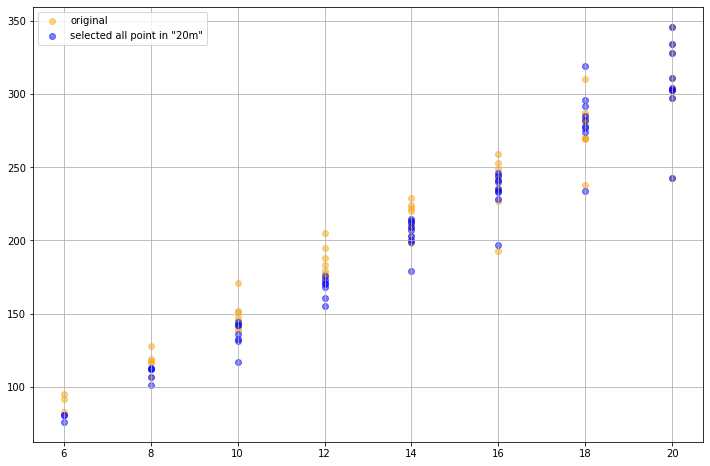

In [632]:
# plot two different data
plt.scatter(df_depth_regression['variable'].values, df_depth_regression['value'].values, c="orange", alpha=0.5)
plt.scatter(df_selected_depth_regression['variable'].values, df_selected_depth_regression['value'].values, c="blue", alpha=0.5)
plt.legend(['original', 'selected all point in "20m"'])
plt.grid(True)

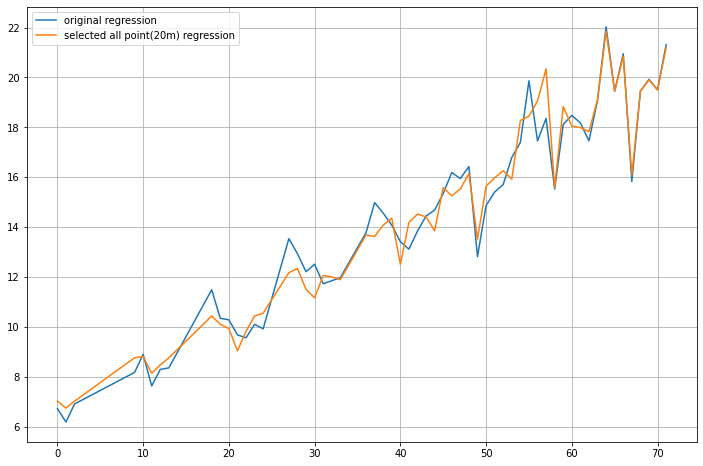

In [633]:
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(df_depth_regression['regression'])
plt.plot(df_selected_depth_regression['regression'])
plt.legend(['original regression', 'selected all point(20m) regression'])
plt.grid(True)

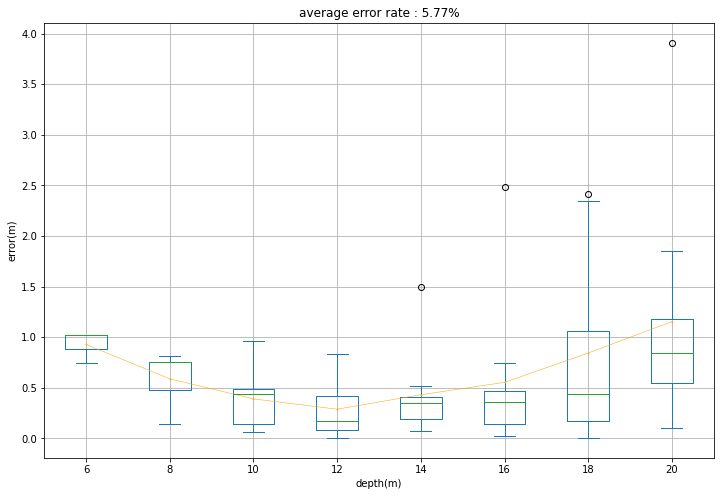

In [634]:
# Selected box plot
boxplot(df_selected_reg_diff_ori, df_selected_error_rate_ori)

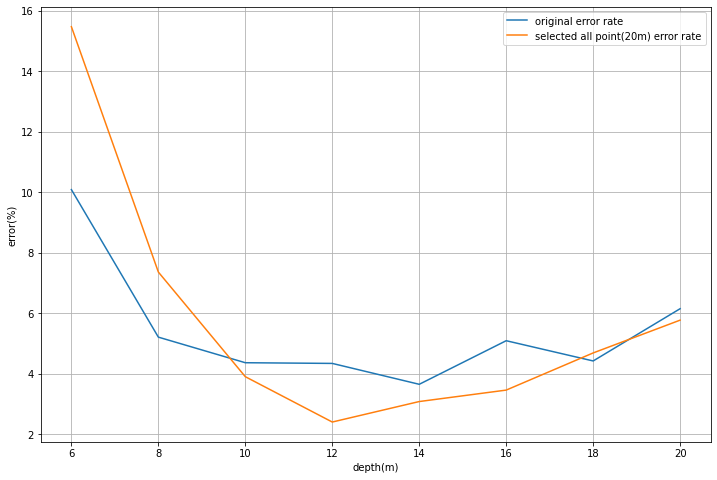

In [635]:
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(depth_name_list, df_error_rate_ori)
plt.plot(depth_name_list, df_selected_error_rate_ori)
plt.legend(['original error rate', 'selected all point(20m) error rate'])
plt.xlabel('depth(m)')
plt.ylabel('error(%)')
plt.grid(True)

# Plot -*test*

In [5]:
category = 'test'

---

## ewns analysis

In [589]:
df_s_value = df_depth_regression[['value']]
df_s_value.rename(columns={'value':'south'}, inplace=True)

c:\users\seok436\anaconda3\envs\real_meter\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [590]:
df_ewns = pd.DataFrame()
df_ewns['variable'] = df_depth_regression[['variable']]
df_ewns['east'] = df_e_value
df_ewns['west'] = df_w_value
df_ewns['north'] = df_n_value
df_ewns['south'] = df_s_value
df_ewns

,variable,east,west,north,south
0,6,96.0,97.0,92.0,83.0
1,6,82.0,85.0,83.0,87.0
2,6,98.0,94.0,95.0,89.0
9,8,114.0,117.0,116.0,122.0
10,8,116.0,127.0,128.0,111.0
11,8,111.0,112.0,107.0,114.0
12,8,118.0,127.1,118.0,116.0
13,8,123.0,114.0,119.0,116.1
18,10,147.0,149.0,171.0,142.0
19,10,146.0,142.0,152.0,144.0


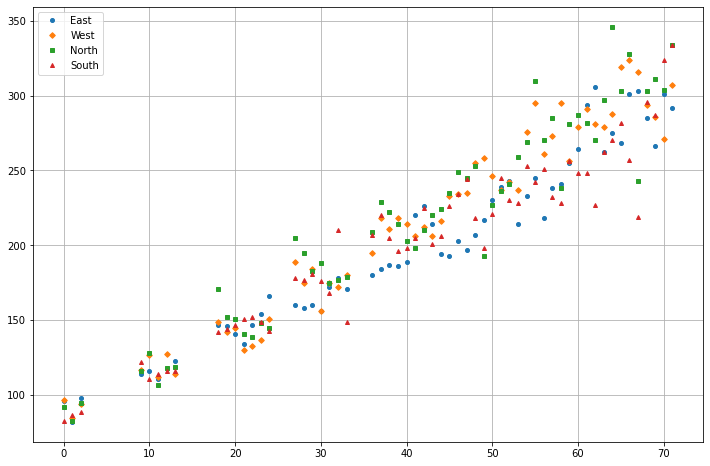

In [658]:
plt.plot(df_ewns['east'], alpha=1, marker='o', linestyle="", markersize=4, linewidth=0.5)
plt.plot(df_ewns['west'], alpha=1, marker='D', linestyle="", markersize=4, linewidth=0.5)
plt.plot(df_ewns['north'], alpha=1, marker='s', linestyle="", markersize=4, linewidth=0.5)
plt.plot(df_ewns['south'], alpha=1, marker='^', linestyle="", markersize=4, linewidth=0.5)
plt.grid(True)
plt.legend(['East', 'West', 'North', 'South'])

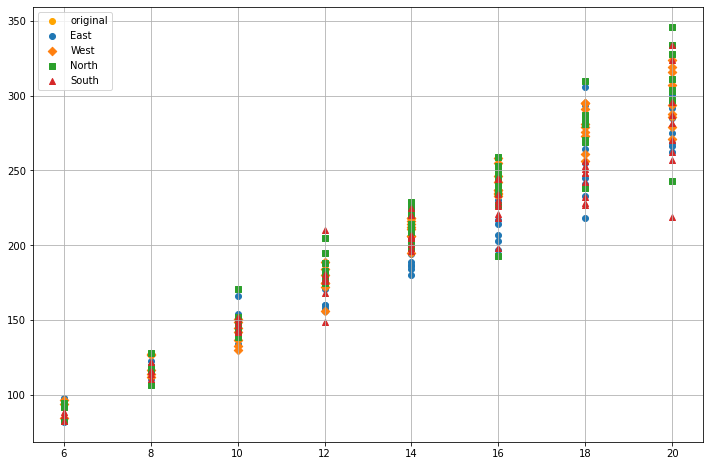

In [657]:
plt.scatter(df_depth_regression['variable'].values, df_depth_regression['value'].values, c="orange", alpha=1)
plt.scatter(df_depth_regression['variable'].values, df_ewns['east'], alpha=1, marker='o')
plt.scatter(df_depth_regression['variable'].values, df_ewns['west'], alpha=1, marker='D')
plt.scatter(df_depth_regression['variable'].values, df_ewns['north'], alpha=1, marker='s')
plt.scatter(df_depth_regression['variable'].values, df_ewns['south'].values, alpha=1, marker='^')
plt.grid(True)
plt.legend(['original', 'East', 'West', 'North', 'South'])

Text(0.5, 0, 'depth value')

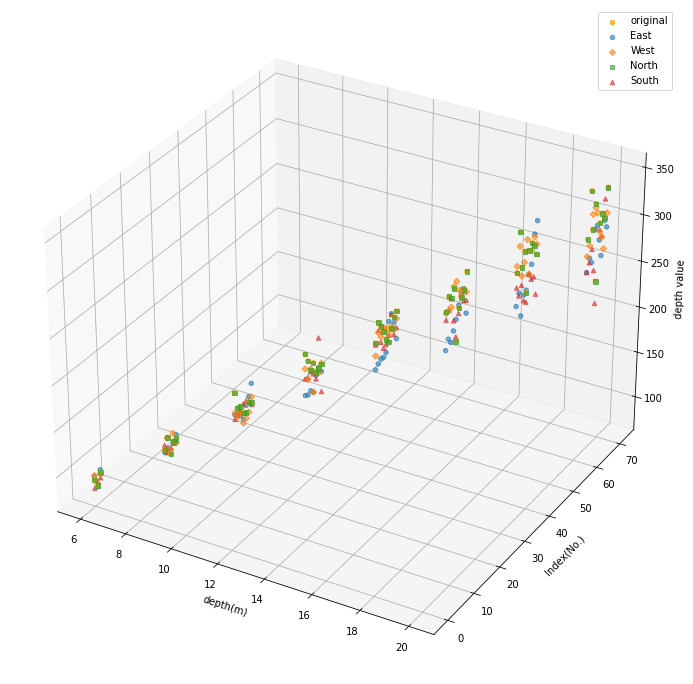

In [815]:
fig = plt.figure(figsize=(12,78))
ax = fig.add_subplot(projection='3d')
ax.scatter(df_depth_regression['variable'].values, df_depth_regression.index, df_depth_regression['value'].values, c="orange", alpha=0.8)
ax.scatter(df_depth_regression['variable'].values, df_depth_regression.index, df_ewns['east'], alpha=0.6, marker='o')
ax.scatter(df_depth_regression['variable'].values, df_depth_regression.index, df_ewns['west'], alpha=0.6, marker='D')
ax.scatter(df_depth_regression['variable'].values, df_depth_regression.index, df_ewns['north'], alpha=0.6, marker='s')
ax.scatter(df_depth_regression['variable'].values, df_depth_regression.index, df_ewns['south'].values, alpha=0.6, marker='^')
plt.grid(True)
plt.legend(['Original', 'East', 'West', 'North', 'South'])
plt.xlabel('depth(m)')
plt.ylabel('Index(No.)')
ax.set_zlabel('depth value')

<AxesSubplot:>

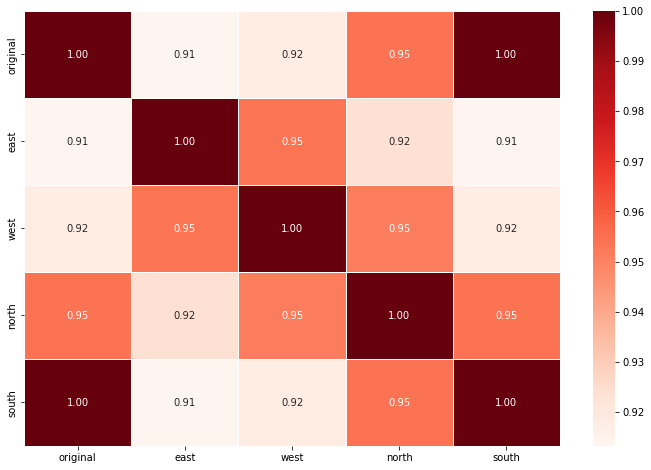

In [593]:
df_for_corr = df_ewns.iloc[:, [1,2,3,4]]
df_for_corr['original'] = df_depth_regression['value'].values
df_for_corr = df_for_corr[['original', 'east', 'west', 'north', 'south']]
depth_corr_data = df_for_corr.corr(method = 'pearson')
sns.heatmap(data = depth_corr_data, annot = True, fmt = '.2f', linewidths = .5, cmap = 'Reds')

In [637]:
df_twofive_regression = pd.DataFrame()

# avg depth at distance

In [762]:
selected_avg_depth_list = []
for i in selected_depth_list:
    selected_avg_depth_list.append(int(np.mean(i)))
    print(int(np.mean(i)))

79
109
135
167
204
233
281
307


[79, 109, 135, 167, 204, 233, 281]

In [740]:
df_selected_2_depth_regression = pd.DataFrame(selected_depth_list[:2], depth_name_list[:2]).T.melt().dropna(axis=0)
df_feature, poly_leg = utils.poly_feature(df_selected_2_depth_regression['value'].values.reshape(-1, 1), degree)
lin_reg_2 = LinearRegression()
df_selected_2_depth_regression

,variable,value
0,6,81.0
1,6,76.0
2,6,81.0
5,8,112.0
6,8,113.0
7,8,101.0
8,8,107.0
9,8,112.0


In [706]:
lin_reg_2.fit(df_feature, df_selected_2_depth_regression['variable'].values)
df_selected_depth_regression['regression_avg_point'] = lin_reg_2.predict(poly_leg.fit_transform(df_selected_depth_regression['value'].values.reshape(-1, 1)))

array([ 6.49720251,  6.19718878,  6.49720251,  8.3572876 ,  8.41729035,
        7.69725741,  8.05727388,  8.3572876 , 10.15736996,  9.79735348,
        9.61734525,  8.65730133,  9.49733976, 10.15736996, 10.27737545,
       12.01745505, 12.19746329, 11.29742211, 10.93740564, 11.89744956,
       11.83744682, 11.71744133, 13.63752917, 13.57752642, 14.05754838,
       14.35756211, 12.37747152, 14.17755387, 14.53757034, 14.41756485,
       13.8175374 , 15.6776225 , 15.31760603, 15.61761975, 16.27764995,
       13.45752093, 15.73762524, 16.09764171, 16.39765544, 16.03763897,
       18.55775426, 18.73776249, 19.39779269, 20.77785582, 15.6776225 ,
       19.15778171, 18.31774328, 18.25774053, 18.0777323 , 19.45779543,
       22.39792994, 19.8178119 , 21.31788053, 16.2176472 , 19.8178119 ,
       20.29783386, 19.87781465, 21.677897  ])

In [701]:
df_selected_2_depth_regression = pd.DataFrame(selected_avg_depth_list[:], depth_name_list[:]).T.melt().dropna(axis=0)
df_feature, poly_leg = utils.poly_feature(df_selected_2_depth_regression['value'].values.reshape(-1, 1), degree)
lin_reg_2 = LinearRegression()

,variable,value
0,6,79
1,8,109
2,10,135
3,12,167
4,14,204
5,16,233
6,18,281
7,20,307


In [821]:
selected_depth_list

[[81, 76, 81],
 [112, 113, 101, 107, 112],
 [142, 136, 133, 117, 131, 142, 144],
 [173, 176, 161, 155, 171, 170, 168],
 [200, 199, 207, 212, 179, 209, 215, 213, 203],
 [234, 228, 233, 244, 197, 235, 241, 246, 240],
 [282, 285, 296, 319, 234, 292, 278, 277, 274],
 [297, 346, 303, 328, 243, 303, 311, 304, 334]]

In [818]:
for n in range(1, 8):
    if n == 1:
        temp_regression = pd.DataFrame(selected_depth_list[:], depth_name_list[:]).T.melt().dropna(axis=0)
    else:
        temp_regression = pd.DataFrame(selected_depth_list[:n], depth_name_list[:n]).T.melt().dropna(axis=0)
    df_feature, poly_leg = utils.poly_feature(temp_regression['value'].values.reshape(-1, 1), degree)
    lin_reg_2 = LinearRegression()
    lin_reg_2.fit(df_feature, temp_regression['variable'].values)
    predict_Y = lin_reg_2.predict(poly_leg.fit_transform(df_selected_depth_regression['value'].values.reshape(-1, 1)))
    df_selected_depth_regression['regression_{}_point'.format(n)] = lin_reg_2.predict(
    poly_leg.fit_transform(df_selected_depth_regression['value'].values.reshape(-1, 1)))
df_selected_depth_regression

,variable,value,regression,regression_2_point,regression_3_point,regression_4_point,regression_5_point,regression_avg_point,regression_1_point,regression_6_point,regression_7_point,regression_8_point,regression_9_point
0,6,81.0,7.021407,6.188679,6.269395,6.323660,6.509432,6.497203,7.021407,6.551254,6.920585,6.497203,6.497203
1,6,76.0,6.741515,5.874214,5.938410,5.998305,6.203760,6.197189,6.741515,6.245514,6.638540,6.197189,6.197189
2,6,81.0,7.021407,6.188679,6.269395,6.323660,6.509432,6.497203,7.021407,6.551254,6.920585,6.497203,6.497203
9,8,112.0,8.756734,8.138365,8.321503,8.340860,8.404601,8.357288,8.756734,8.446846,8.669268,8.357288,8.357288
10,8,113.0,8.812712,8.201258,8.387700,8.405931,8.465735,8.417290,8.812712,8.507995,8.725677,8.417290,8.417290
11,8,101.0,8.140973,7.446541,7.593335,7.625079,7.732122,7.697257,8.140973,7.774217,8.048768,7.697257,7.697257
12,8,107.0,8.476842,7.823899,7.990518,8.015505,8.098929,8.057274,8.476842,8.141106,8.387223,8.057274,8.057274
13,8,112.0,8.756734,8.138365,8.321503,8.340860,8.404601,8.357288,8.756734,8.446846,8.669268,8.357288,8.357288
18,10,142.0,10.436083,10.025157,10.307414,10.292989,10.238635,10.157370,10.436083,10.281290,10.361542,10.157370,10.157370
19,10,136.0,10.100213,9.647799,9.910232,9.902563,9.871828,9.797353,10.100213,9.914402,10.023087,9.797353,9.797353


In [838]:
for n in range(1, 8):
    if 1 >= n and n < 4:
        temp_regression = pd.DataFrame(selected_depth_list[:], depth_name_list[:]).T.melt().dropna(axis=0)
    else:
        temp_regression = pd.DataFrame(selected_avg_depth_list[n], depth_name_list[n]).T.melt().dropna(axis=0)
    df_feature, poly_leg = utils.poly_feature(temp_regression['value'].values.reshape(-1, 1), degree)
    lin_reg_2 = LinearRegression()
    lin_reg_2.fit(df_feature, temp_regression['variable'].values)
    predict_Y = lin_reg_2.predict(poly_leg.fit_transform(df_selected_depth_regression['value'].values.reshape(-1, 1)))
    df_selected_depth_regression['regression_{}_point'.format(n)] = lin_reg_2.predict(
    poly_leg.fit_transform(df_selected_depth_regression['value'].values.reshape(-1, 1)))
df_selected_depth_regression

ValueError: DataFrame constructor not properly called!

c:\users\seok436\anaconda3\envs\real_meter\lib\site-packages\numpy\core\_methods.py:163: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)


array([40.5, 38. , 40.5, 56. , 56.5, 50.5, 53.5, 56. ])

In [675]:
lin_reg_2.fit(df_feature, df_selected_2_depth_regression['variable'].values)
lin_reg_2.coef_
lin_reg_2.intercept_
#df_selected_2_depth_regression['variable'].values

1.094339622641507

In [678]:
predict_Y = lin_reg_2.predict(poly_leg.fit_transform(df_selected_depth_regression['value'].values.reshape(-1, 1)))
predict_Y

array([ 6.18867925,  5.87421384,  6.18867925,  8.13836478,  8.20125786,
        7.44654088,  7.82389937,  8.13836478, 10.02515723,  9.64779874,
        9.4591195 ,  8.45283019,  9.33333333, 10.02515723, 10.1509434 ,
       11.97484277, 12.16352201, 11.22012579, 10.8427673 , 11.8490566 ,
       11.78616352, 11.66037736, 13.67295597, 13.61006289, 14.11320755,
       14.42767296, 12.35220126, 14.23899371, 14.6163522 , 14.49056604,
       13.86163522, 15.81132075, 15.43396226, 15.74842767, 16.44025157,
       13.48427673, 15.87421384, 16.25157233, 16.56603774, 16.18867925,
       18.83018868, 19.01886792, 19.71069182, 21.1572327 , 15.81132075,
       19.4591195 , 18.57861635, 18.51572327, 18.32704403, 19.77358491,
       22.85534591, 20.1509434 , 21.72327044, 16.37735849, 20.1509434 ,
       20.65408805, 20.21383648, 22.10062893])

In [411]:
df_selected_depth_regression['regression_2_point'] = lin_reg_2.predict(
    poly_leg.fit_transform(df_selected_depth_regression['value'].values.reshape(-1, 1)))

In [742]:
df_twofive_regression = df_selected_depth_regression

Text(0, 0.5, 'Value')

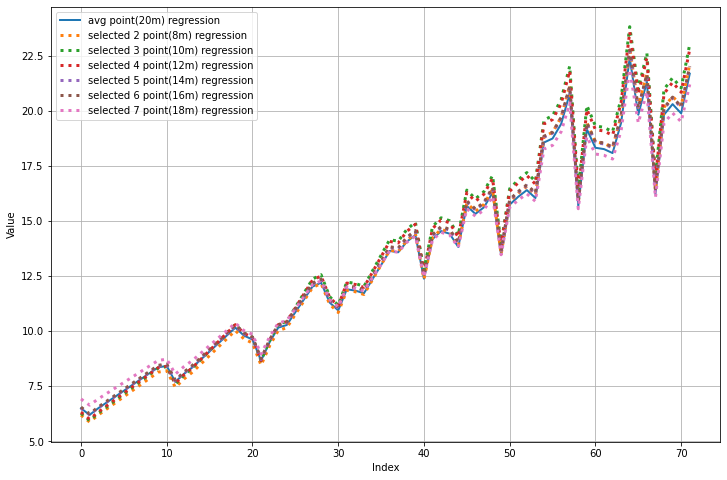

In [819]:
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(df_selected_depth_regression['regression_avg_point'], linewidth=2)
plt.plot(df_selected_depth_regression['regression_2_point'], linestyle=":", linewidth=3)
plt.plot(df_selected_depth_regression['regression_3_point'], linestyle=":", linewidth=3)
plt.plot(df_selected_depth_regression['regression_4_point'], linestyle=":", linewidth=3)
plt.plot(df_selected_depth_regression['regression_5_point'], linestyle=":", linewidth=3)
plt.plot(df_selected_depth_regression['regression_6_point'], linestyle=":", linewidth=3)
plt.plot(df_selected_depth_regression['regression_7_point'], linestyle=":", linewidth=3)
plt.legend(['avg point(20m) regression', 'selected 2 point(8m) regression', 'selected 3 point(10m) regression', 
            'selected 4 point(12m) regression', 'selected 5 point(14m) regression',
           'selected 6 point(16m) regression', 'selected 7 point(18m) regression'])
plt.grid(True)
plt.xlabel('Index')
plt.ylabel('Value')

Text(0, 0.5, 'Value')

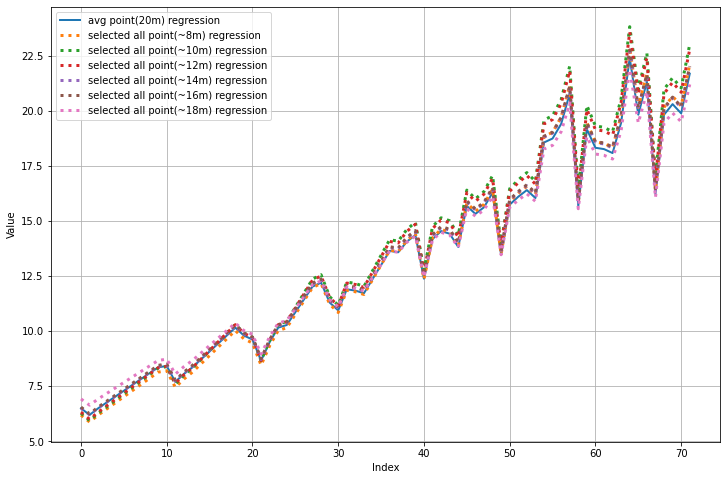

In [832]:
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(df_selected_depth_regression['regression_avg_point'], linewidth=2)
plt.plot(df_selected_depth_regression['regression_2_point'], linestyle=":", linewidth=3)
plt.plot(df_selected_depth_regression['regression_3_point'], linestyle=":", linewidth=3)
plt.plot(df_selected_depth_regression['regression_4_point'], linestyle=":", linewidth=3)
plt.plot(df_selected_depth_regression['regression_5_point'], linestyle=":", linewidth=3)
plt.plot(df_selected_depth_regression['regression_6_point'], linestyle=":", linewidth=3)
plt.plot(df_selected_depth_regression['regression_7_point'], linestyle=":", linewidth=3)
plt.legend(['avg point(20m) regression', 'selected all point(~8m) regression', 'selected all point(~10m) regression', 
            'selected all point(~12m) regression', 'selected all point(~14m) regression',
           'selected all point(~16m) regression', 'selected all point(~18m) regression'])
plt.grid(True)
plt.xlabel('Index')
plt.ylabel('Value')

In [826]:
# Divided dataframe 2 spot point to 5 spot point
df_error_original = df_selected_depth_regression[['variable', 'value', 'regression']]
df_error_2_point = df_selected_depth_regression[['variable', 'value', 'regression_2_point']]
df_error_3_point = df_selected_depth_regression[['variable', 'value', 'regression_3_point']]
df_error_4_point = df_selected_depth_regression[['variable', 'value', 'regression_4_point']]
df_error_5_point = df_selected_depth_regression[['variable', 'value', 'regression_5_point']]
df_error_6_point = df_selected_depth_regression[['variable', 'value', 'regression_6_point']]
df_error_7_point = df_selected_depth_regression[['variable', 'value', 'regression_7_point']]
df_error_avg_point = df_selected_depth_regression[['variable', 'value', 'regression_avg_point']]

In [827]:
# Rename for calculating error
df_error_2_point.rename(columns={'regression_2_point':'regression'}, inplace=True)
df_error_3_point.rename(columns={'regression_3_point':'regression'}, inplace=True)
df_error_4_point.rename(columns={'regression_4_point':'regression'}, inplace=True)
df_error_5_point.rename(columns={'regression_5_point':'regression'}, inplace=True)
df_error_6_point.rename(columns={'regression_6_point':'regression'}, inplace=True)
df_error_7_point.rename(columns={'regression_7_point':'regression'}, inplace=True)
df_error_avg_point.rename(columns={'regression_avg_point':'regression'}, inplace=True)

c:\users\seok436\anaconda3\envs\real_meter\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [828]:
#Original
df_selected_reg_diff_ori, df_selected_error_rate_ori = cal_error_regression(depth_name_list, df_error_original)

In [829]:
df_selected_2_point_reg_diff, df_selected_2_point_error_rate = cal_error_regression(depth_name_list, df_error_2_point)
df_selected_3_point_reg_diff, df_selected_3_point_error_rate = cal_error_regression(depth_name_list, df_error_3_point)
df_selected_4_point_reg_diff, df_selected_4_point_error_rate = cal_error_regression(depth_name_list, df_error_4_point)
df_selected_5_point_reg_diff, df_selected_5_point_error_rate = cal_error_regression(depth_name_list, df_error_5_point)
df_selected_6_point_reg_diff, df_selected_6_point_error_rate = cal_error_regression(depth_name_list, df_error_6_point)
df_selected_7_point_reg_diff, df_selected_7_point_error_rate = cal_error_regression(depth_name_list, df_error_7_point)
df_selected_avg_point_reg_diff, df_selected_avg_point_error_rate = cal_error_regression(depth_name_list, df_error_avg_point)

In [830]:
np.mean(df_selected_avg_point_error_rate)

4.524828709216015

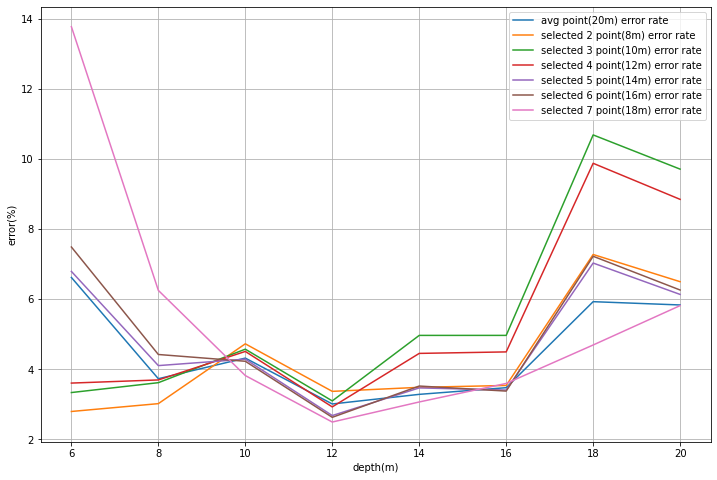

In [831]:
plt.plot(depth_name_list, df_selected_avg_point_error_rate)
plt.plot(depth_name_list, df_selected_2_point_error_rate)
plt.plot(depth_name_list, df_selected_3_point_error_rate)
plt.plot(depth_name_list, df_selected_4_point_error_rate)
plt.plot(depth_name_list, df_selected_5_point_error_rate)
plt.plot(depth_name_list, df_selected_6_point_error_rate)
plt.plot(depth_name_list, df_selected_7_point_error_rate)
plt.legend(['avg point(20m) error rate', 
            'selected 2 point(8m) error rate', 'selected 3 point(10m) error rate', 
            'selected 4 point(12m) error rate', 'selected 5 point(14m) error rate',
           'selected 6 point(16m) error rate', 'selected 7 point(18m) error rate'])
plt.xlabel('depth(m)')
plt.ylabel('error(%)')
plt.grid(True)

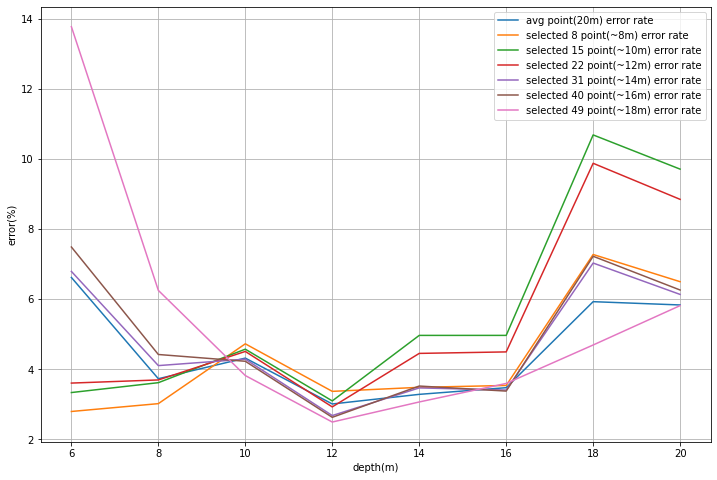

In [834]:
plt.plot(depth_name_list, df_selected_avg_point_error_rate)
plt.plot(depth_name_list, df_selected_2_point_error_rate)
plt.plot(depth_name_list, df_selected_3_point_error_rate)
plt.plot(depth_name_list, df_selected_4_point_error_rate)
plt.plot(depth_name_list, df_selected_5_point_error_rate)
plt.plot(depth_name_list, df_selected_6_point_error_rate)
plt.plot(depth_name_list, df_selected_7_point_error_rate)
plt.legend(['avg point(20m) error rate', 
            'selected 8 point(~8m) error rate', 'selected 15 point(~10m) error rate', 
            'selected 22 point(~12m) error rate', 'selected 31 point(~14m) error rate',
           'selected 40 point(~16m) error rate', 'selected 49 point(~18m) error rate'])
plt.xlabel('depth(m)')
plt.ylabel('error(%)')
plt.grid(True)

---